In [66]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a25a523bb689e49c590dc93b39dc5ae2


In [9]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [10]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

632

In [21]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mar del plata
Processing Record 2 of Set 1 | ammon
Processing Record 3 of Set 1 | klaksvik
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | artyom
Processing Record 6 of Set 1 | brae
Processing Record 7 of Set 1 | beyneu
Processing Record 8 of Set 1 | general pico
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | palmer
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | dingle
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | college
Processing Record 15 of Set 1 | dikson
Processing Record 16 of Set 1 | mrirt
City not found. Skipping...
Processing Record 17 of Set 1 | cabo san lucas
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | vestmanna
Processing Record 20 of Set 1 | namibe
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | tiksi
Processing Record 23 of

Processing Record 37 of Set 4 | victoria point
Processing Record 38 of Set 4 | mouzouras
Processing Record 39 of Set 4 | kranjska gora
Processing Record 40 of Set 4 | quatre cocos
Processing Record 41 of Set 4 | kurumkan
Processing Record 42 of Set 4 | provideniya
Processing Record 43 of Set 4 | yulara
Processing Record 44 of Set 4 | nikolskoye
Processing Record 45 of Set 4 | hobyo
Processing Record 46 of Set 4 | balykshi
Processing Record 47 of Set 4 | rabaul
Processing Record 48 of Set 4 | vanimo
Processing Record 49 of Set 4 | kisaran
Processing Record 50 of Set 4 | coquimbo
Processing Record 1 of Set 5 | longyearbyen
Processing Record 2 of Set 5 | davila
Processing Record 3 of Set 5 | lae
Processing Record 4 of Set 5 | port lincoln
Processing Record 5 of Set 5 | bababe
City not found. Skipping...
Processing Record 6 of Set 5 | srednekolymsk
Processing Record 7 of Set 5 | ha giang
Processing Record 8 of Set 5 | tabora
Processing Record 9 of Set 5 | narsaq
Processing Record 10 of Set

Processing Record 24 of Set 8 | vostok
Processing Record 25 of Set 8 | auki
Processing Record 26 of Set 8 | gat
Processing Record 27 of Set 8 | villarrica
Processing Record 28 of Set 8 | noumea
Processing Record 29 of Set 8 | marsa matruh
Processing Record 30 of Set 8 | tabialan
City not found. Skipping...
Processing Record 31 of Set 8 | sitka
Processing Record 32 of Set 8 | norsup
Processing Record 33 of Set 8 | along
Processing Record 34 of Set 8 | saleaula
City not found. Skipping...
Processing Record 35 of Set 8 | barra
Processing Record 36 of Set 8 | rehoboth
Processing Record 37 of Set 8 | lipari
Processing Record 38 of Set 8 | castro
Processing Record 39 of Set 8 | aloleng
Processing Record 40 of Set 8 | hovd
Processing Record 41 of Set 8 | north bend
Processing Record 42 of Set 8 | el alto
Processing Record 43 of Set 8 | mayo
Processing Record 44 of Set 8 | santa maria
Processing Record 45 of Set 8 | lorengau
Processing Record 46 of Set 8 | adrar
Processing Record 47 of Set 8 |

Processing Record 13 of Set 12 | buriti dos lopes
Processing Record 14 of Set 12 | cockburn harbour
City not found. Skipping...
Processing Record 15 of Set 12 | kachikau
City not found. Skipping...
Processing Record 16 of Set 12 | doctor arroyo
Processing Record 17 of Set 12 | saint-augustin
Processing Record 18 of Set 12 | linxia
Processing Record 19 of Set 12 | sao bento do una
City not found. Skipping...
Processing Record 20 of Set 12 | progreso
Processing Record 21 of Set 12 | kuybyshevskiy zaton
Processing Record 22 of Set 12 | nortelandia
Processing Record 23 of Set 12 | nambucca heads
Processing Record 24 of Set 12 | puyang
Processing Record 25 of Set 12 | ferrol
Processing Record 26 of Set 12 | paamiut
Processing Record 27 of Set 12 | bac lieu
Processing Record 28 of Set 12 | chanute
Processing Record 29 of Set 12 | taua
Processing Record 30 of Set 12 | coihaique
Processing Record 31 of Set 12 | yeppoon
Processing Record 32 of Set 12 | marawi
Processing Record 33 of Set 12 | br

In [22]:
len(city_data)

578

In [27]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mar Del Plata,-38.0023,-57.5575,78.01,83,40,12.66,AR,2021-04-06 16:50:10
1,Ammon,43.4696,-111.9666,34.00,93,90,12.66,US,2021-04-06 16:50:10
2,Klaksvik,62.2266,-6.5890,28.40,64,75,21.85,FO,2021-04-06 16:50:10
3,Jamestown,42.0970,-79.2353,66.99,47,75,5.75,US,2021-04-06 16:50:11
4,Artyom,40.4723,50.3330,46.40,76,0,6.91,AZ,2021-04-06 16:50:11
5,Brae,60.3964,-1.3530,35.60,80,90,32.21,GB,2021-04-06 16:50:12
6,Beyneu,45.3167,55.2000,52.95,51,66,15.95,KZ,2021-04-06 16:50:12
7,General Pico,-35.6566,-63.7568,83.35,49,1,16.93,AR,2021-04-06 16:50:12
8,Kapaa,22.0752,-159.3190,71.60,73,90,23.02,US,2021-04-06 16:50:13
9,Palmer,42.1584,-72.3287,59.00,31,20,9.22,US,2021-04-06 16:50:13


In [31]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mar Del Plata,AR,2021-04-06 16:50:10,-38.0023,-57.5575,78.01,83,40,12.66
1,Ammon,US,2021-04-06 16:50:10,43.4696,-111.9666,34.00,93,90,12.66
2,Klaksvik,FO,2021-04-06 16:50:10,62.2266,-6.5890,28.40,64,75,21.85
3,Jamestown,US,2021-04-06 16:50:11,42.0970,-79.2353,66.99,47,75,5.75
4,Artyom,AZ,2021-04-06 16:50:11,40.4723,50.3330,46.40,76,0,6.91
...,...,...,...,...,...,...,...,...,...
573,Olonets,RU,2021-04-06 16:53:37,60.9847,32.9698,33.84,71,46,11.74
574,Ibiapina,BR,2021-04-06 16:53:38,-3.9233,-40.8894,82.60,45,86,5.68
575,Saint Anthony,US,2021-04-06 16:53:10,45.0205,-93.2180,62.60,48,75,5.75
576,Santa Marta,CO,2021-04-06 16:52:08,11.2408,-74.1990,88.00,69,99,1.99


In [43]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [44]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

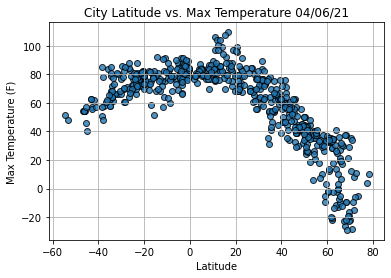

In [45]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

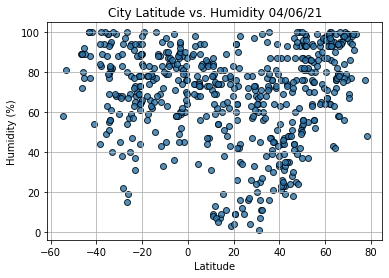

In [46]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

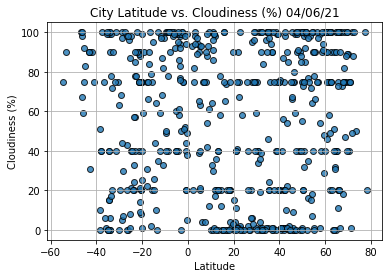

In [47]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

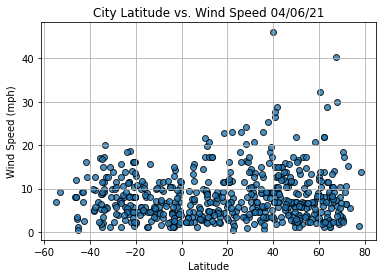

In [48]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [49]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [50]:
index13 = city_data_df.loc[13]
index13

City                      College
Country                        US
Date          2021-04-06 16:50:15
Lat                       64.8569
Lng                      -147.803
Max Temp                        0
Humidity                       76
Cloudiness                     40
Wind Speed                   1.21
Name: 13, dtype: object

In [51]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4       True
       ...  
573     True
574    False
575     True
576     True
577     True
Name: Lat, Length: 578, dtype: bool

In [55]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Ammon,US,2021-04-06 16:50:10,43.4696,-111.9666,34.00,93,90,12.66
2,Klaksvik,FO,2021-04-06 16:50:10,62.2266,-6.5890,28.40,64,75,21.85
3,Jamestown,US,2021-04-06 16:50:11,42.0970,-79.2353,66.99,47,75,5.75
4,Artyom,AZ,2021-04-06 16:50:11,40.4723,50.3330,46.40,76,0,6.91
5,Brae,GB,2021-04-06 16:50:12,60.3964,-1.3530,35.60,80,90,32.21


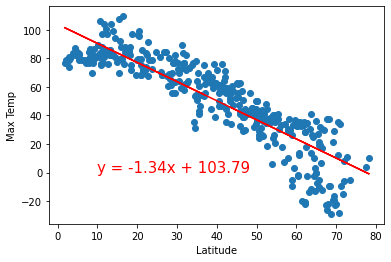

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \ 
                       for Maximum Temperature', 'Max Temp',(10,0))


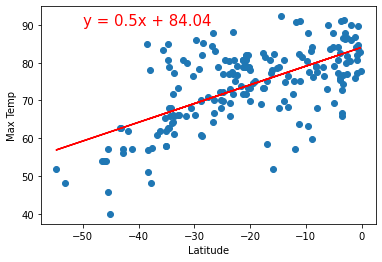

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

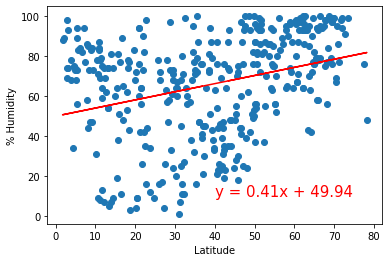

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

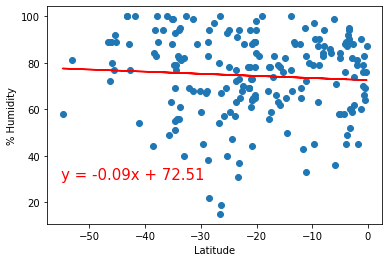

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-55,30))

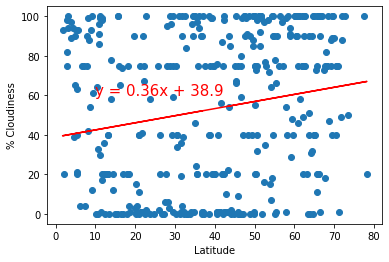

In [78]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,60))

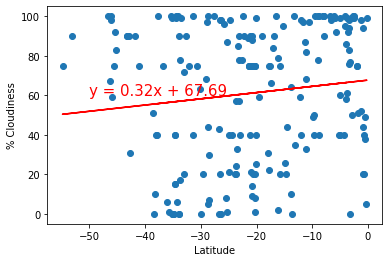

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

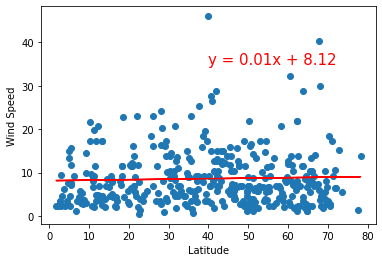

In [84]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

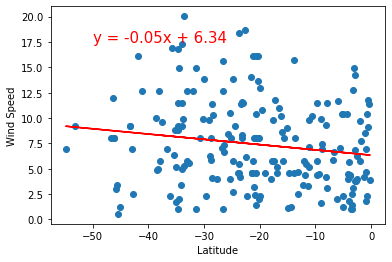

In [86]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,17.5))